In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set_style("whitegrid")

# Movie Industry - Is It Worth It?

In [2]:
movie_budgets = pd.read_csv("data/tn.movie_budgets.csv.gz")

In [3]:
#Define function to convert data to int to do calculations
def money_str_to_int(ms):
    return int(ms.lstrip("$").replace(",", ""))

In [4]:
#Use function above to convert to int
movie_budgets.production_budget = movie_budgets.production_budget.apply(lambda x: money_str_to_int(x))
movie_budgets.domestic_gross = movie_budgets.domestic_gross.apply(lambda x: money_str_to_int(x))
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.apply(lambda x: money_str_to_int(x))


In [5]:
# Create some additional columns: Ticket_sales, Profit, Profit_margin, Date and P&L_percent
movie_budgets['Ticket_sales'] = (movie_budgets.domestic_gross + movie_budgets.worldwide_gross)
movie_budgets['Profit'] = (movie_budgets.Ticket_sales - movie_budgets.production_budget)
movie_budgets['Profit_margin'] = (movie_budgets.Profit/movie_budgets.production_budget)
movie_budgets['Date'] = movie_budgets['release_date'].astype('datetime64[ns]')
movie_budgets["P&L_percent"] = (movie_budgets.domestic_gross + movie_budgets.worldwide_gross - 
                        movie_budgets.production_budget)/movie_budgets.production_budget

In [6]:

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Ticket_sales,Profit,Profit_margin,Date,P&L_percent
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904,7.322007,2009-12-18,7.322007
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750,2.133774,2011-05-20,2.133774
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300,-0.449929,2019-06-07,-0.449929
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831,4.632244,2015-05-01,4.632244
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129,5.110105,2017-12-15,5.110105


Consider four budget categories:
- micro-budget: 0 to 500k [denote 0]
- low-budget: 500k to 3 mil [denote 1]
- big-budget: 3 mil to 50 mil [denote 2]
- mega-budget: anything higher [denote 3]

In [7]:
#Define function to break down movie production_budgets into budget categories
def get_budget_cat(pb):
    if pb <= 500000:
        return 0
    elif pb <= 3000000:
        return 1
    elif pb <= 50000000:
        return 2
    else:
        return 3

In [8]:
#Apply function defined above
movie_budgets["budget_cat"] = movie_budgets.production_budget.apply(lambda x: get_budget_cat(x))

In [9]:
#Create individual series for respective budget categories
micro_budget = movie_budgets[movie_budgets.budget_cat == 0]
low_budget = movie_budgets[movie_budgets.budget_cat == 1]
big_budget = movie_budgets[movie_budgets.budget_cat == 2]
mega_budget = movie_budgets[movie_budgets.budget_cat == 3]

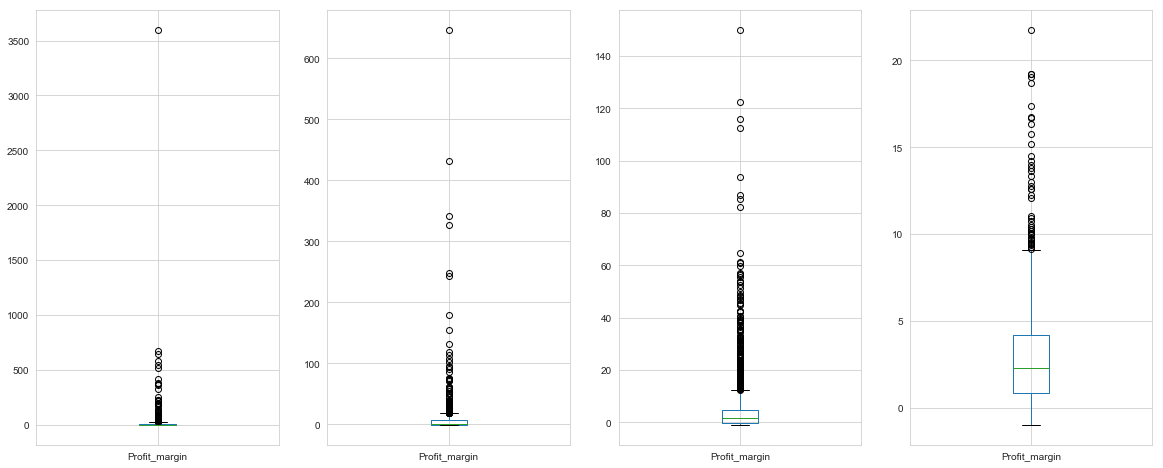

In [10]:
#Create box plots to evaluate central tendency and variations
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(141)
micro_budget["Profit_margin"].plot.box()

ax2 = fig.add_subplot(142)
low_budget["Profit_margin"].plot.box()

ax3 = fig.add_subplot(143)
big_budget["Profit_margin"].plot.box()

ax4 = fig.add_subplot(144)
mega_budget["Profit_margin"].plot.box()

plt.show()


In [11]:
#Perform data cleaning and drop rows, first create a copy of all the data
movie_budgets_adj = movie_budgets
movie_budgets_adj.describe()

,id,production_budget,domestic_gross,worldwide_gross,Ticket_sales,Profit,Profit_margin,P&L_percent,budget_cat
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08,1.017730e+08,6.783702,6.783702,1.932203
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08,2.108880e+08,54.922090,54.922090,0.748108
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.574753e+08,-1.000000,-1.000000,0.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06,-3.098222e+05,-0.202878,-0.202878,2.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07,2.499538e+07,1.659315,1.659315,2.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08,1.111648e+08,4.893170,4.893170,2.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09,3.111853e+09,3599.000000,3599.000000,3.000000


In [12]:
#Drop movies that have domestic sales ==  worldwide sales as this seems to be is bad user input
movie_budgets_adj = movie_budgets_adj.loc[~(movie_budgets_adj.worldwide_gross == movie_budgets_adj.domestic_gross)]

In [13]:
#Drop movies with Profir_margin above 75% (4th Quartile), this will still capture outstanding P&Ls of more than 500% profit
movie_budgets_adj = movie_budgets_adj.loc[~(movie_budgets_adj['Profit_margin'] > 5.5)]

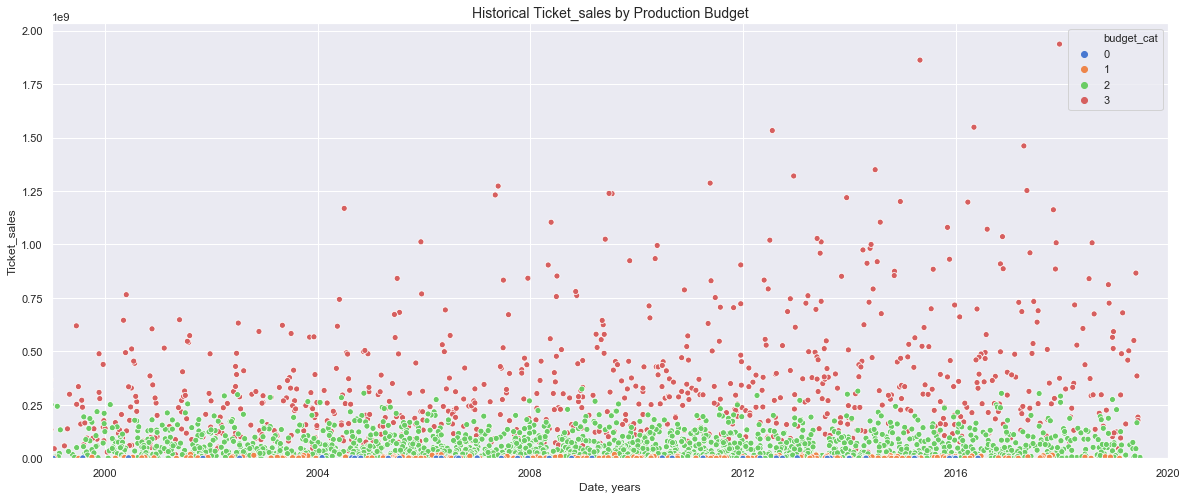

In [27]:
#Plot to check historical evolution of Ticket_sales
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Historical Ticket_sales by Production Budget', fontsize = 14)
sns.scatterplot(x=movie_budgets_adj.Date.tolist(), y=(movie_budgets_adj['Ticket_sales']), 
                hue = movie_budgets_adj['budget_cat'], palette=sns.color_palette("muted")[:4])
#Date can go back to 1936, thus drop all till 1999
plt.xlim(datetime(1999, 1, 1), datetime(2020, 1, 1))
plt.ylim(0.00, None)
plt.xlabel('Date, years')
plt.show()

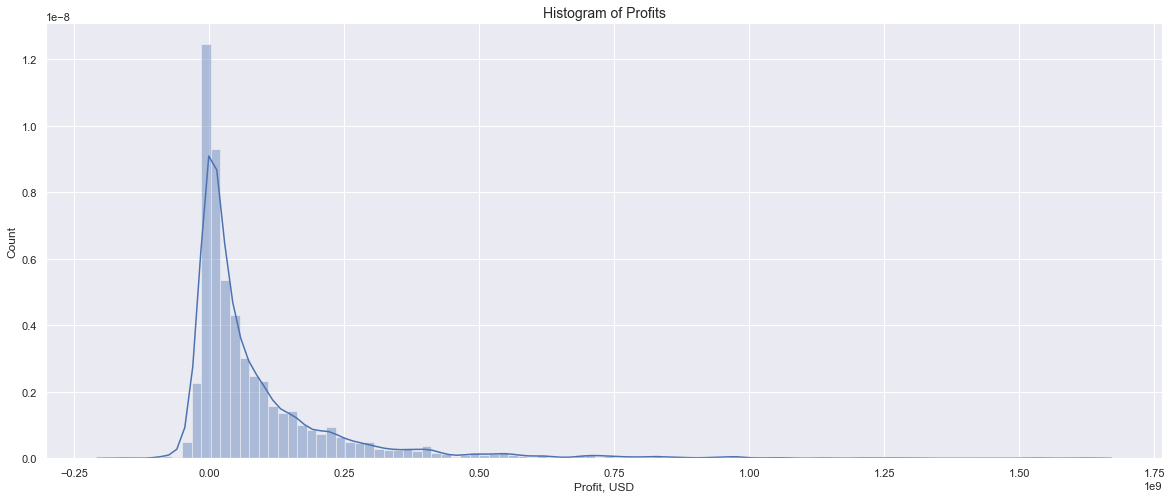

In [25]:
#Plot to check approximate distribution of Profits
sns.distplot(movie_budgets_adj['Profit'], bins = 100) 
#sns.distplot(movie_budgets_adj['Profit_margin'], bins = 100) 
plt.title('Histogram of Profits', fontsize = 14)
plt.ylabel('Count')
plt.xlabel('Profit, USD')
plt.show()

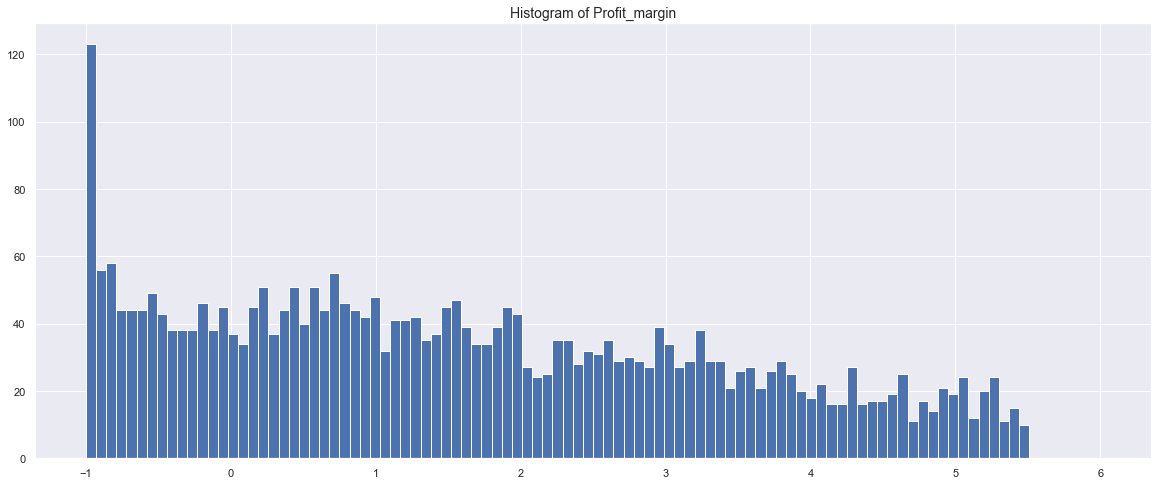

In [16]:
#Plot to check frequency counts of different Profit_margins
plt.figure(figsize = (20,8))
plt.title('Histogram of Profit_margin', fontsize = 14)
data = movie_budgets_adj['Profit_margin']
plt.hist(x = data, bins = 100, range = (-1, 6))
# to do: show 717 titles with P&L <0 in red color, also convert x-axis in % from -100% to 550%
plt.show()

In [17]:
#Rerun box plots on budget categories
micro_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 0]
low_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 1]
big_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 2]
mega_budget_adj = movie_budgets_adj[movie_budgets_adj.budget_cat == 3]

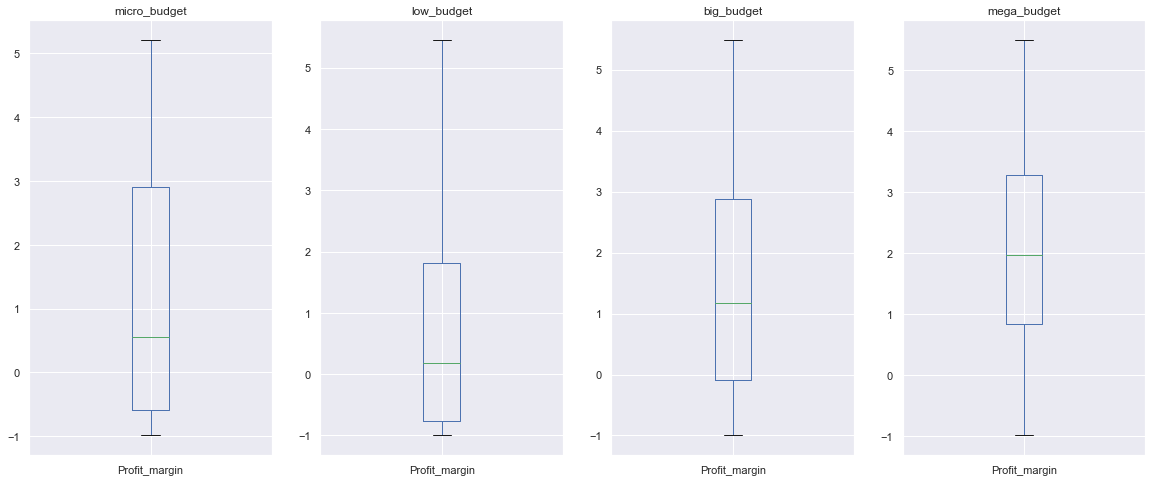

In [18]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(141)
micro_budget_adj["Profit_margin"].plot.box(title='micro_budget')

ax2 = fig.add_subplot(142)
low_budget_adj["Profit_margin"].plot.box(title='low_budget')

ax3 = fig.add_subplot(143)
big_budget_adj["Profit_margin"].plot.box(title='big_budget')

ax4 = fig.add_subplot(144)
mega_budget_adj["Profit_margin"].plot.box(title='mega_budget')

plt.show()

# Based on our findings below (see 4 boxplot charts) it is our recommendation to avoid micro-budget (<=$.5M) and 
# low badget (<=$3M) strategies as these movies tend to have larger volatility of ticket sales and may lose money. 
# Big-budget (<=$50M) and mega-budget strategies seem to be warranted from expected profitability stand point of view.

(0, 3253588.800834713)

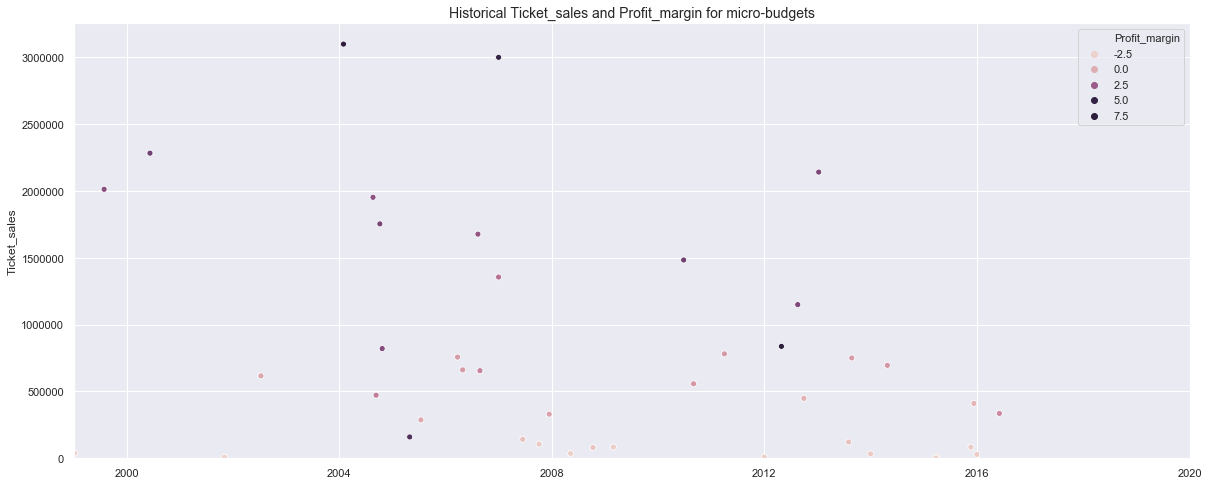

In [19]:
#Plot to check historical Ticket_sales and Profit_margin by different product categories
plt.title('Historical Ticket_sales and Profit_margin for micro-budgets', fontsize = 14)
sns.scatterplot(x=micro_budget_adj.Date.tolist(), y=(micro_budget_adj['Ticket_sales']),
                hue = ((micro_budget_adj['Profit_margin'])))
plt.xlim(datetime(1999, 1, 1), datetime(2020, 1, 1))
plt.ylim(0, None)

(0, 19744979.900834717)

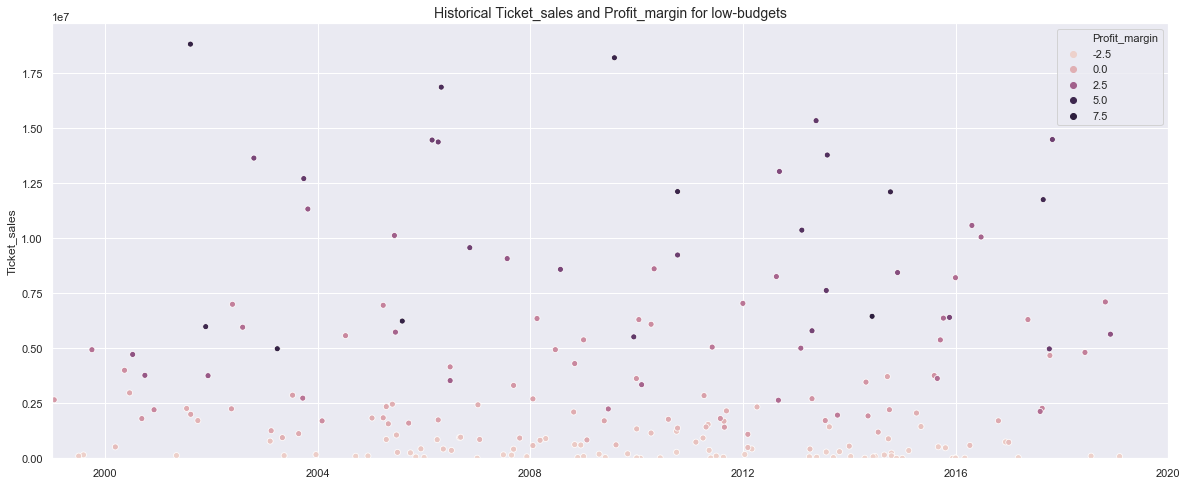

In [20]:
plt.title('Historical Ticket_sales and Profit_margin for low-budgets', fontsize = 14)
sns.scatterplot(x=low_budget_adj.Date.tolist(), y=(low_budget_adj['Ticket_sales']),
                hue = ((low_budget_adj['Profit_margin'])))
plt.xlim(datetime(1999, 1, 1), datetime(2020, 1, 1))
plt.ylim(0, None)

(0, 339865937.4508347)

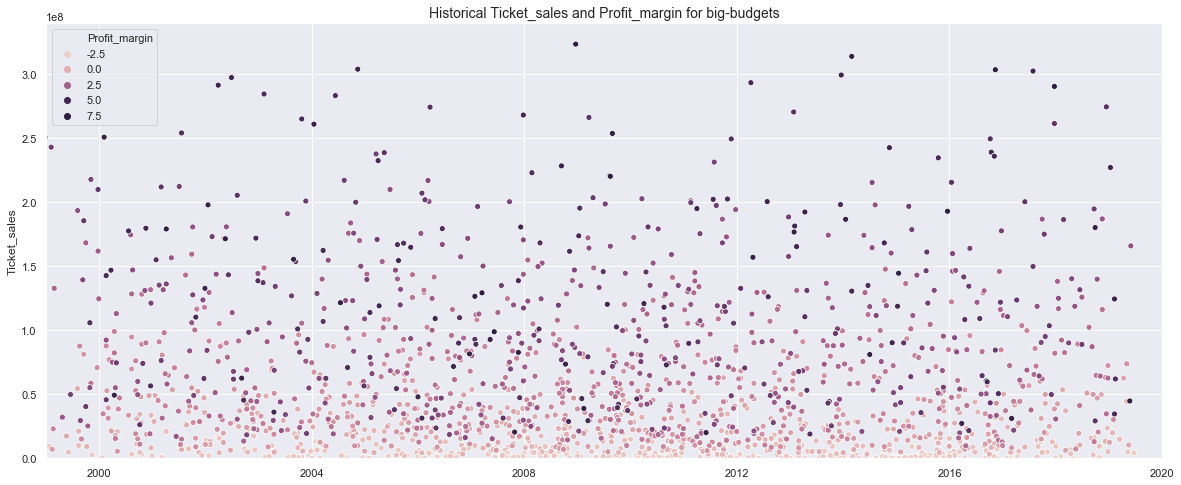

In [21]:
plt.title('Historical Ticket_sales and Profit_margin for big-budgets', fontsize = 14)
sns.scatterplot(x=big_budget_adj.Date.tolist(), y=(big_budget_adj['Ticket_sales']),
                hue = ((big_budget_adj['Profit_margin'])))
plt.xlim(datetime(1999, 1, 1), datetime(2020, 1, 1))
plt.ylim(0, None)

(0, 2033722471.5008347)

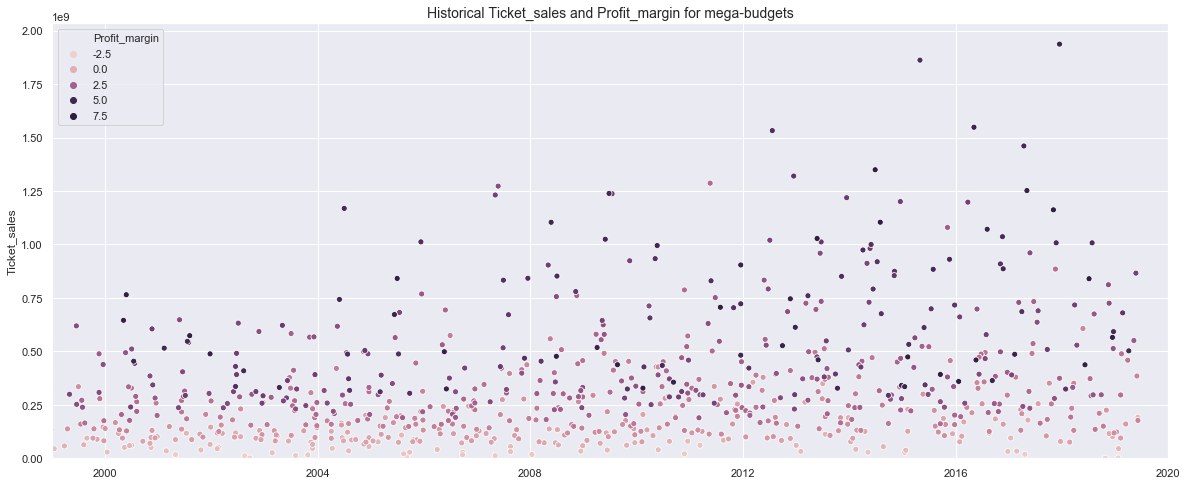

In [22]:

plt.title('Historical Ticket_sales and Profit_margin for mega-budgets', fontsize = 14)
sns.scatterplot(x=mega_budget_adj.Date.tolist(), y=(mega_budget_adj['Ticket_sales']),
                hue = ((mega_budget_adj['Profit_margin'])))
plt.xlim(datetime(1999, 1, 1), datetime(2020, 1, 1))
plt.ylim(0, None)